# Simple Linear Regression

In [1]:
%pip install scikit-learn --upgrade --user

Note: you may need to restart the kernel to use updated packages.


## Restart and run all cells

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

## Read the 50 startups Datasets

In [3]:
import os
os.chdir('C:/Datasets/')

In [4]:
import pandas as pd
df =pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

## Visualize Relationship Between RND and Profit.

<Axes: xlabel='RND', ylabel='PROFIT'>

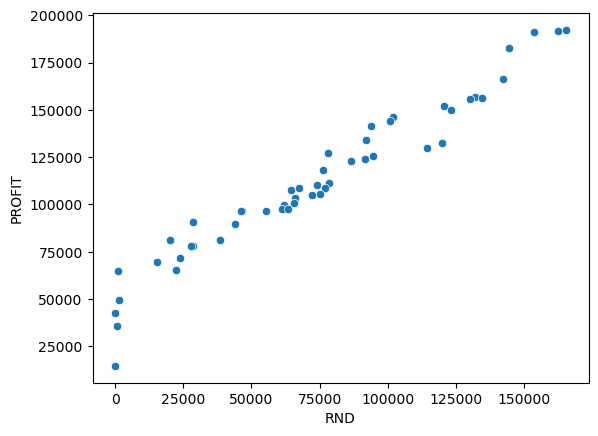

In [10]:
import seaborn as sns
sns.scatterplot(data = df,x = 'RND', y = 'PROFIT')

# Separate X and Y

In [14]:
X = df[['RND']]
Y = df[['PROFIT']]

In [15]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [16]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Import Linear Regression from scikit-learn.

In [17]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

## Get the coefficient and intercept the model

In [20]:
model.intercept_

array([49032.89914125])

In [21]:
model.coef_

array([[0.85429137]])

$ PROFIT = 49032.89 + 0.8543*RND $

## Predict the values for Profit

In [22]:
ypred = model.predict(X)

In [24]:
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [25]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Plot the Regression Line

<Axes: xlabel='RND', ylabel='PROFIT'>

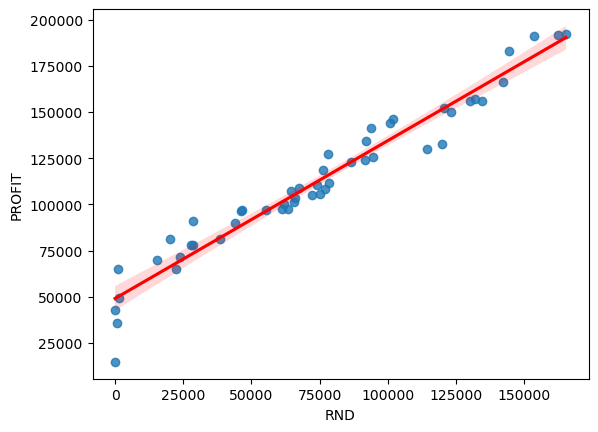

In [26]:
sns.regplot(data=df,x='RND',y='PROFIT',line_kws={'color':'red'})

## Estimate all the metrics

1. Mean Squared Error
2. Root Mean Squared Error
3. Mean Absolute Error
4. R2 Score

In [27]:
# R2 Score
model.score(X,Y)

0.9465353160804392

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [30]:
mse = mean_squared_error(Y,ypred)
mse

85120931.32706907

In [31]:
rmse = mse**(1/2)
rmse

9226.100548285232

In [32]:
mae = mean_absolute_error(Y,ypred)
mae

6910.984354579614

In [33]:
r2 = r2_score(Y,ypred)
r2

0.9465353160804392

# Conclusions:
1. RND and PROFIT have a strong linear relationship(R2>0.8)
2. 𝑃𝑅𝑂𝐹𝐼𝑇=49032.89+0.8543x𝑅𝑁𝐷
3. If RND increases by 1000 then PROFIT is estimated to increase by 854.3

## for new startup estimate the profit

In [34]:
rnd = [[150000]]
profit = model.predict(rnd)
profit

array([[177176.60478207]])